# Soccer Recommender System

We are building a soccer player recommender system, this system will assist football scouts when they want a player with a certain playing style. For example, PSG would want to fill the void Messi has left in the team. The best way to do that might be to have a players that is similar to Messi.

# Table of Contents

1. [Introduction](#introduction)
2. [Data Collection](#data-collection)
3. [Data Preprocessing](#data-preprocessing)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Modeling](#modeling)
7. [Evaluation](#evaluation)
8. [Conclusion](#conclusion)

---

## 1. Introduction <a name="introduction"></a>
Your introduction goes here. Provide an overview of your data science project, the problem you are trying to solve, and the main objectives.

[Back to Top](#table-of-contents)

---

### 1.1 Importing libraries

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


## 2. Data Collection <a name="data-collection"></a>
In this section, explain where and how you gathered the data for your project. Discuss any challenges faced during data collection and how you addressed them.

[Back to Top](#table-of-contents)

---

The data used in this notebook was donwloaded from kaggle. It was not stated how the person gathered the data. We will assume that they used multiple sources to gather this data. We will post a link to the person's kaggle dataset.

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/Vambane/SoccerPlayerRecommender/main/FullData.csv')

In [39]:
df.head() #viewing the first five rows of the datasets

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


## 3. Data Preprocessing <a name="data-preprocessing"></a>
Detail the steps you took to clean and preprocess the raw data. This may include handling missing values, data transformation, and normalization.

[Back to Top](#table-of-contents)

---



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   National_Position   1075 non-null   object 
 3   National_Kit        1075 non-null   float64
 4   Club                17588 non-null  object 
 5   Club_Position       17587 non-null  object 
 6   Club_Kit            17587 non-null  float64
 7   Club_Joining        17587 non-null  object 
 8   Contract_Expiry     17587 non-null  float64
 9   Rating              17588 non-null  int64  
 10  Height              17588 non-null  object 
 11  Weight              17588 non-null  object 
 12  Preffered_Foot      17588 non-null  object 
 13  Birth_Date          17588 non-null  object 
 14  Age                 17588 non-null  int64  
 15  Preffered_Position  17588 non-null  object 
 16  Work

The `national postion` and `kit` columns have the largest number of missing values. This could be players that have not been selected for the national team. We may need to remove these columns. 

In [41]:
print('There ' + str(len(df.columns)) + ' columns in this dataset')

There 53 columns in this dataset


In [42]:
print('These are the columns ', df.columns)

These are the columns  Index(['Name', 'Nationality', 'National_Position', 'National_Kit', 'Club',
       'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry',
       'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age',
       'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves',
       'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle',
       'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position',
       'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass',
       'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance',
       'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing',
       'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys',
       'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling',
       'GK_Reflexes'],
      dtype='object')


In [43]:
df[df['National_Position'] == 'LM'].head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
39,David Silva,Spain,LM,21.0,Manchester City,LCM,21.0,07/14/2010,2019.0,87,...,74,83,77,77,80,1,1,1,1,1
45,David Alaba,Austria,LM,8.0,FC Bayern,LB,27.0,02/10/2010,2021.0,86,...,83,78,83,80,68,15,5,14,7,9
76,Dimitri Payet,France,LM,8.0,Olym. Marseille,LW,11.0,01/29/2017,2021.0,85,...,83,90,91,76,79,14,11,9,15,12
86,Yannick Carrasco,Belgium,LM,18.0,Atlético Madrid,LM,10.0,07/10/2015,2022.0,84,...,75,81,78,74,68,10,9,9,11,10
123,João Mário,Portugal,LM,10.0,Inter,Sub,6.0,08/28/2016,2021.0,83,...,73,74,67,66,69,8,6,8,15,8


**Due to the amount of missing values in the `National_Position` and `National_Kit`, we are going to block these two columns**

In [44]:
df = df.drop(['National_Position', 'National_Kit'], axis = 1)

Lets look at the df.info() again now that we have removed the national position and kit

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   Club                17588 non-null  object 
 3   Club_Position       17587 non-null  object 
 4   Club_Kit            17587 non-null  float64
 5   Club_Joining        17587 non-null  object 
 6   Contract_Expiry     17587 non-null  float64
 7   Rating              17588 non-null  int64  
 8   Height              17588 non-null  object 
 9   Weight              17588 non-null  object 
 10  Preffered_Foot      17588 non-null  object 
 11  Birth_Date          17588 non-null  object 
 12  Age                 17588 non-null  int64  
 13  Preffered_Position  17588 non-null  object 
 14  Work_Rate           17588 non-null  object 
 15  Weak_foot           17588 non-null  int64  
 16  Skil

In [46]:
df.isna().sum()

Name                  0
Nationality           0
Club                  0
Club_Position         1
Club_Kit              1
Club_Joining          1
Contract_Expiry       1
Rating                0
Height                0
Weight                0
Preffered_Foot        0
Birth_Date            0
Age                   0
Preffered_Position    0
Work_Rate             0
Weak_foot             0
Skill_Moves           0
Ball_Control          0
Dribbling             0
Marking               0
Sliding_Tackle        0
Standing_Tackle       0
Aggression            0
Reactions             0
Attacking_Position    0
Interceptions         0
Vision                0
Composure             0
Crossing              0
Short_Pass            0
Long_Pass             0
Acceleration          0
Speed                 0
Stamina               0
Strength              0
Balance               0
Agility               0
Jumping               0
Heading               0
Shot_Power            0
Finishing             0
Long_Shots      

**Creating a BMI**  

Body Mass Index = (weight in kilograms / height in meters squared)

In [47]:
df[['Weight', 'Height']].head()

,Weight,Height
0,80 kg,185 cm
1,72 kg,170 cm
2,68 kg,174 cm
3,85 kg,182 cm
4,92 kg,193 cm


We will need to remove the `SI units` for oth the Weight and Height

In [48]:
df['Weight'] = df['Weight'].str.replace('kg', '') # removing the kilogram
df['Height'] = df['Height'].str.replace('cm', '') # recoming the centimeters

# Now we have to convert the datatypes of these two columns
# First we will create a coversion dict
convert_dict = {'Height': float,
                'Weight': float
                }
df = df.astype(convert_dict)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                17588 non-null  object 
 1   Nationality         17588 non-null  object 
 2   Club                17588 non-null  object 
 3   Club_Position       17587 non-null  object 
 4   Club_Kit            17587 non-null  float64
 5   Club_Joining        17587 non-null  object 
 6   Contract_Expiry     17587 non-null  float64
 7   Rating              17588 non-null  int64  
 8   Height              17588 non-null  float64
 9   Weight              17588 non-null  float64
 10  Preffered_Foot      17588 non-null  object 
 11  Birth_Date          17588 non-null  object 
 12  Age                 17588 non-null  int64  
 13  Preffered_Position  17588 non-null  object 
 14  Work_Rate           17588 non-null  object 
 15  Weak_foot           17588 non-null  int64  
 16  Skil

In [50]:
# Converting the cenetimeters to meters
df['Height (m)'] = df['Height'] / 100

In [51]:
df['BMI'] = round(df['Weight'] / (df['Height (m)'] * df['Height (m)']), 2)
df['BMI']

0        23.37
1        24.91
2        22.46
3        25.66
4        24.70
         ...  
17583    24.49
17584    23.37
17585    20.38
17586    24.69
17587    22.50
Name: BMI, Length: 17588, dtype: float64

## 4. Exploratory Data Analysis (EDA) <a name="exploratory-data-analysis"></a>
Present the results of your EDA, visualizations, and insights gained from analyzing the dataset. Identify patterns, correlations, and any interesting findings.

[Back to Top](#table-of-contents)

---


### Nationality

In [18]:
df.groupby('Nationality').count().tail()

,Name,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,BMI
Nationality,,,,,,,,,,,,,,,,,,,,,
Uzbekistan,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Venezuela,42,42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
Wales,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
Zambia,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Zimbabwe,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


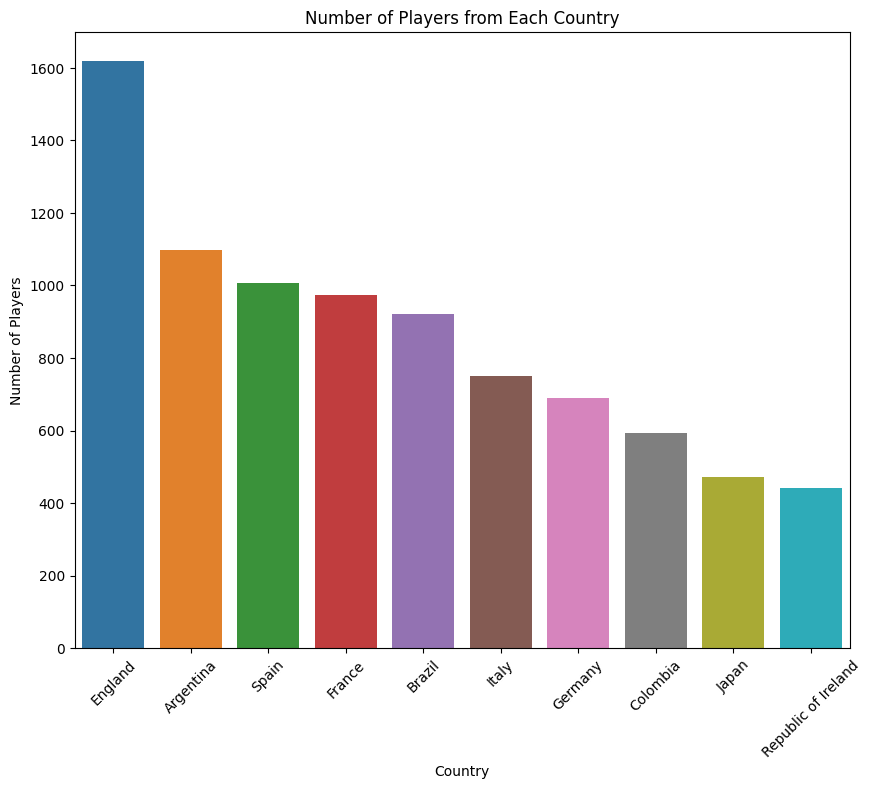

In [52]:
country_counts = df["Nationality"].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Players']

# Selecting the top 10 countries
top_10_countries = country_counts.head(10)
# figure size
plt.figure(figsize=(10, 8))

sns.barplot(x = 'Country', y = "Number of Players", data = top_10_countries)
plt.title('Number of Players from Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

Most of the players in this dataset are from England, 6 of the 10 countries are European. South America also produces a lot of footballers, Argentina and Brazil in particular. 

### Team  
Which teams have the most amount of players, since the EPL is the biggest league. Are english teams going to have the most amount of players?

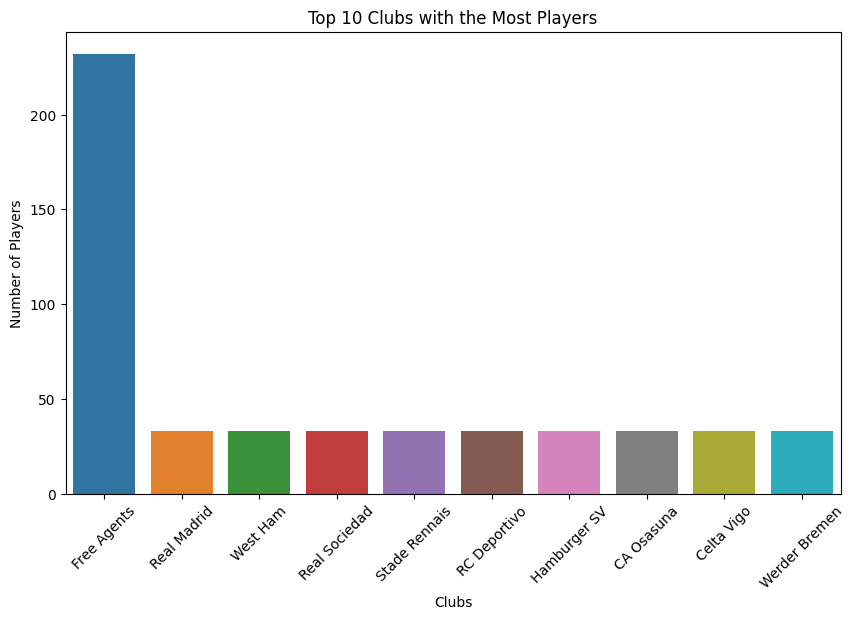

In [53]:
club_counts = df['Club'].value_counts().reset_index()
club_counts.columns = ['Club', 'Number of Players']

# Top 10 clubs based on the squad size
top_10_clubs = club_counts.head(10)

# figure size
plt.figure(figsize=(10,6))

sns.barplot(x='Club', y='Number of Players', data=top_10_clubs)
plt.title('Top 10 Clubs with the Most Players')
plt.xlabel('Clubs')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

The squad sizes are similar across the different leagues. This is visible from the visual above. 

### Club Position

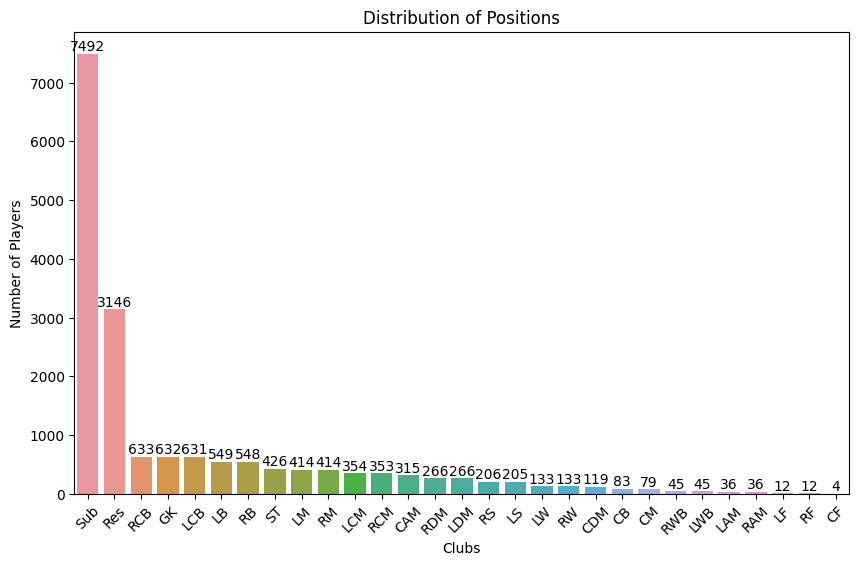

In [54]:
club_counts = df['Club_Position'].value_counts().reset_index()
club_counts.columns = ['Position', 'Number of Players']

# Top 10 clubs based on the squad size
#top_10_clubs = club_counts.head(10)

# figure size
plt.figure(figsize=(10,6))

sns.barplot(x='Position', y='Number of Players', data=club_counts)
plt.title('Distribution of Positions')
plt.xlabel('Clubs')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)

for index, value in enumerate(club_counts['Number of Players']):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

As we move from the back to the front of the field, the number of players in the upfront position decreases. We have more RB than RW. The same is true for a LB and LW relationship.

### Scatterplot: Height v Weight

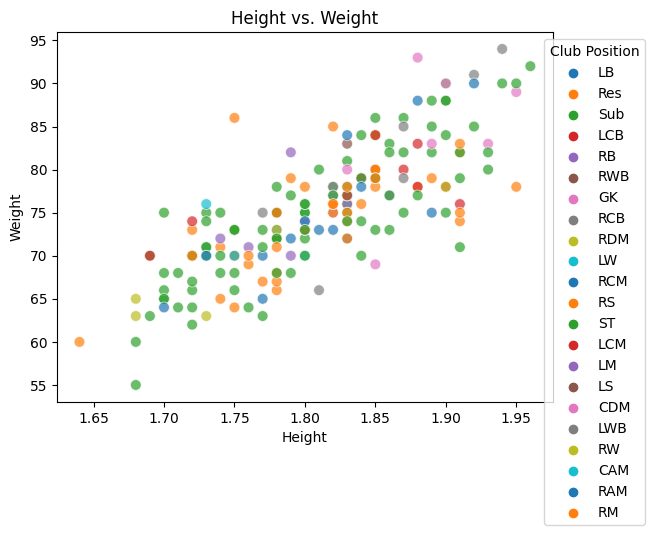

In [55]:
sns.scatterplot(x='Height (m)', y='Weight', data=df.sample(200), hue='Club_Position',
                palette='tab10', s=60, edgecolor='w', alpha=0.7)

# Add a legend for the hue
plt.legend(title='Club Position', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [59]:
df['Club_Position'].unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', nan, 'CF'],
      dtype=object)

In [92]:
def categorize_position(position):
    '''
    This function will shrink the unique football positions into the
    three basic positions with the two additional substitute and reserves
    position.
    
    This will make it easier to quantify the ratio of each position relative
    to the to other
    '''
    if position in ['GK']:
        return 'Goal Keeper'
    elif position in ['RB', 'RCB', 'LB', 'LCB', 'CB', 'RWB', 'LWB']:
        return 'Defender'
    elif position in ['LW', 'RW', 'RCM', 'CAM', 'LCM', 'LM', 'RM', 'CDM', 'RDM', 'LDM', 'CAM', 'CM', 'RAM']:
        return 'Midfielder'
    elif position in ['RS', 'LF', 'LS', 'RF', 'CF']:
        return 'Striker'
    elif position in ['Sub']:
        return 'Substitute'
    else:
        return 'Reserve'

df['Positions'] = df['Club_Position'].apply(categorize_position)
df['Positions'] = df['Positions'].fillna('Reserve')

In [93]:
df.groupby('Positions')['Name'].nunique()

Positions
Defender       2524
Goal Keeper     631
Midfielder     2871
Reserve        3597
Striker         439
Substitute     7441
Name: Name, dtype: int64

<Axes: xlabel='Positions', ylabel='count'>

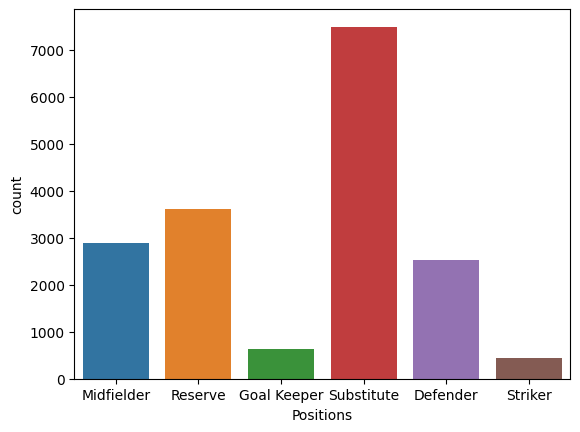

In [96]:
sns.countplot(data=df, x="Positions")

The starting 11 main have three categorises of players in the field.
1. `Defender`
2. `Midfielder`
3. `Striker`
4. `Goal Keeper`

Looking at the starting 11, There's a higher proportion of midfield and defensive players than both Strikers and Goal Keepers. Out of the 11 players the goal keeper and Striker less than 25%. This could be the reason why there are less striker and goal keepers than the other positions.  

The reserve and sub players, I have created a different categorises. These players do not feature in the starting 11.

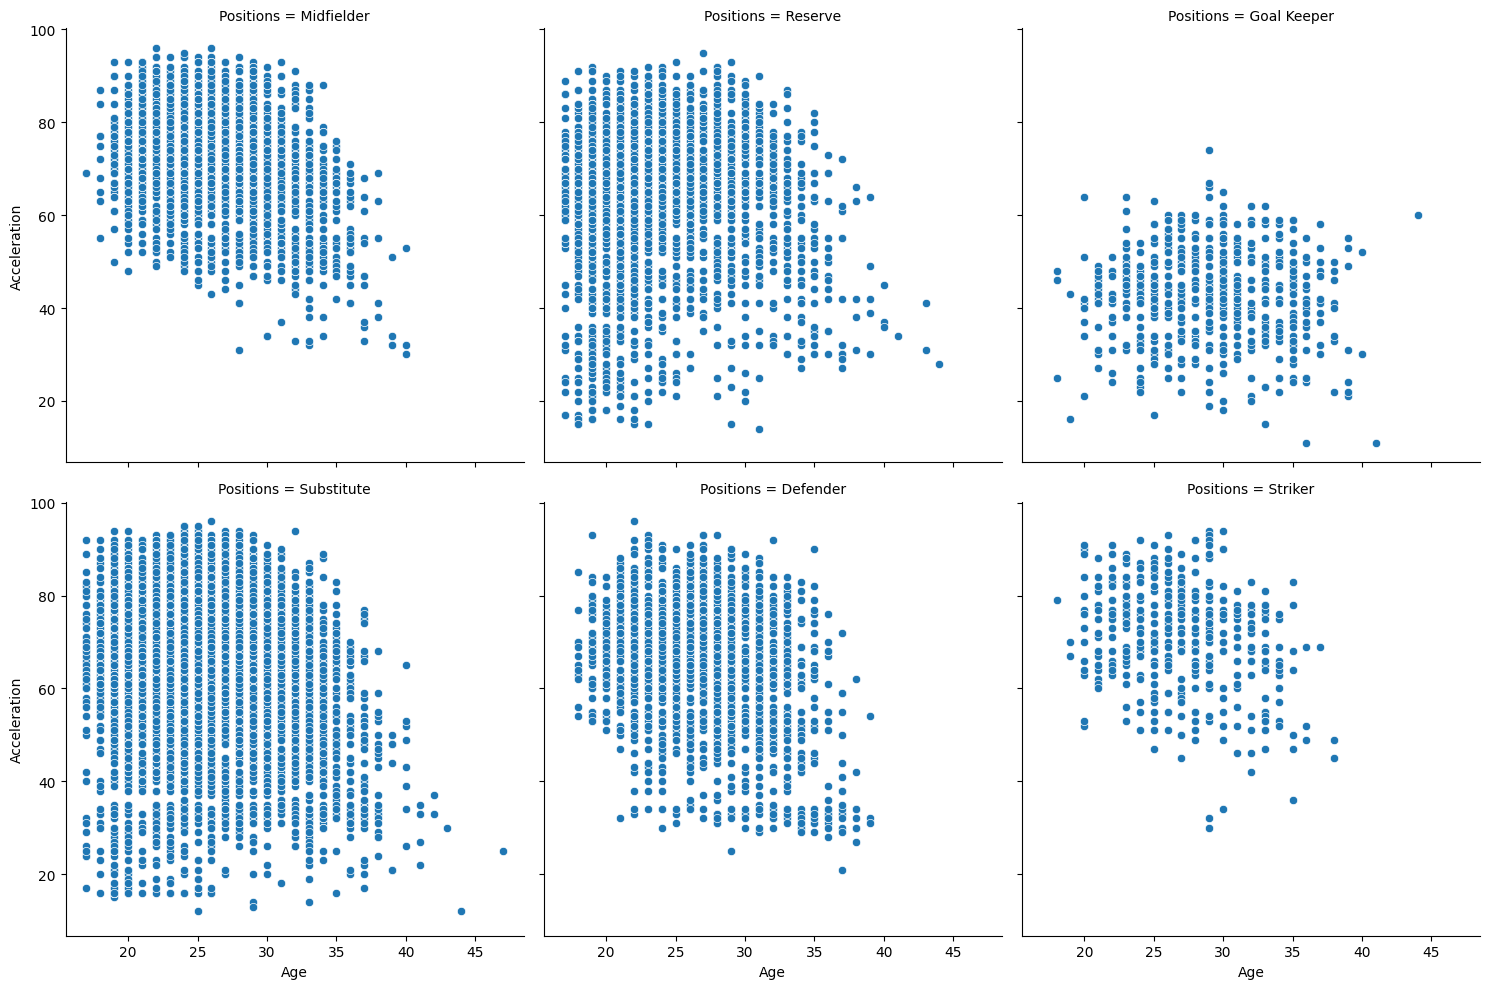

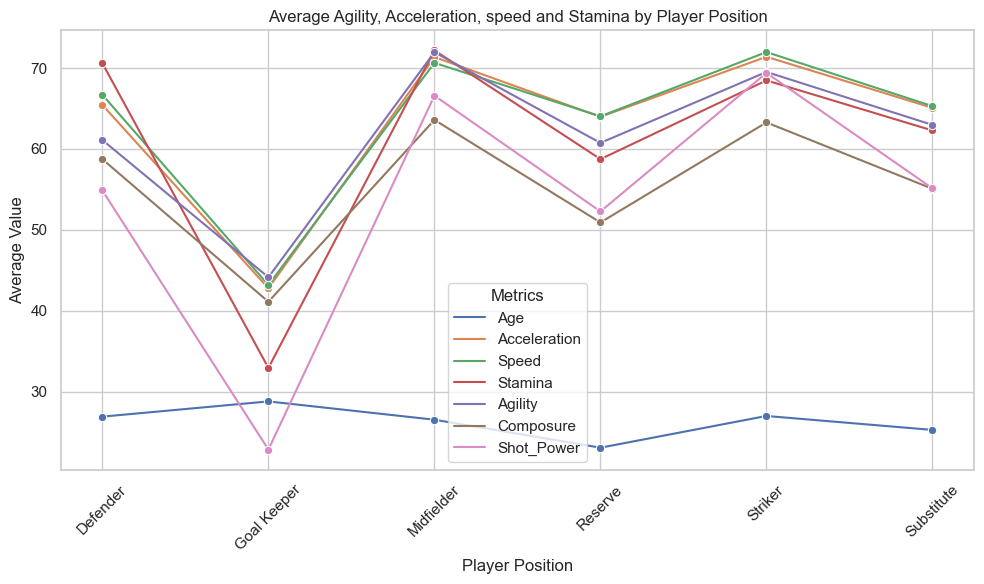

In [108]:
'''
Grouping the data by position and then plotting a multi-line line
chart to show they average data for each position
'''
numeric_df = df[['Positions', 'Age', 'Acceleration', 'Speed', 'Stamina', 'Agility', 'Composure', 'Shot_Power']]
#group by position and calculate the mean
avg_stats_by_position = numeric_df.groupby('Positions').mean().reset_index()

#melting the df from wide to long for ease of plotting
melted_df = pd.melt(avg_stats_by_position, id_vars=['Positions'], value_vars =['Age', 'Acceleration', 'Speed', 'Stamina', 'Agility', 'Composure', 'Shot_Power'])

#Line plot features
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.lineplot(data=melted_df, x='Positions', y='value', hue='variable', marker='o')


plt.title('Average Agility, Acceleration, speed and Stamina by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')

plt.tight_layout()
plt.show()

### Using a Radar chart to show the difference in the above characteristics

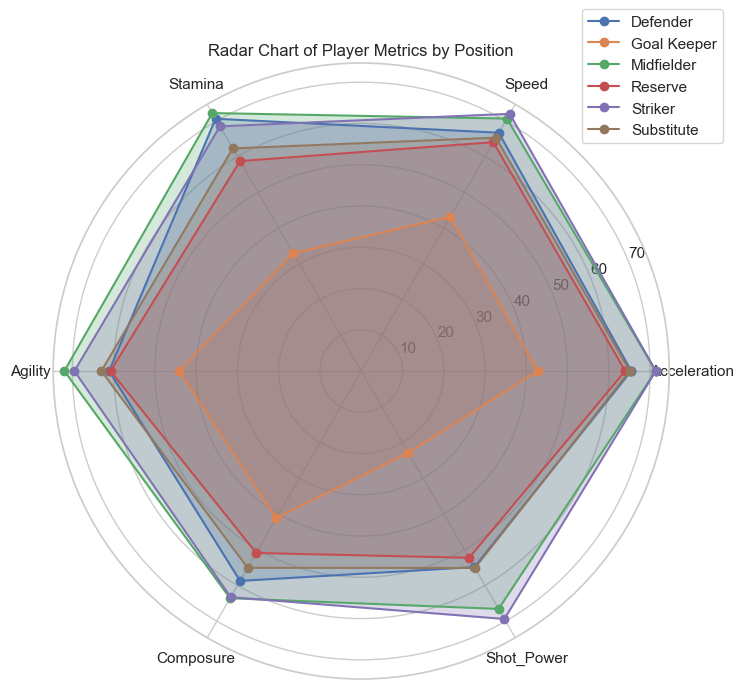

In [111]:
avg_stats_by_position = numeric_df.groupby('Positions').mean()

# List of the metric names
metrics = avg_stats_by_position.columns[1:]

#number of metrics
num_metrics = len(metrics)

#create a list values for each metric
values = avg_stats_by_position.iloc[:, 1:].values.tolist()

# Player Positions 
positions = avg_stats_by_position.index.tolist()

# Calculate angles for each axis
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False)

# Closing the radar plot
angles = np.concatenate((angles, [angles[0]]))

#Creatinng the plot
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

#Plot each player position values
for i, (position, value) in enumerate(zip(positions, values)):
    ax.plot(angles, value + value[:1], marker='o', label=position)
    ax.fill(angles, value + value[:1], alpha=0.25)
    
#Set the labels for each axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)
ax.yaxis.grid(True)

# Set the title and legend
plt.title('Radar Chart of Player Metrics by Position')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

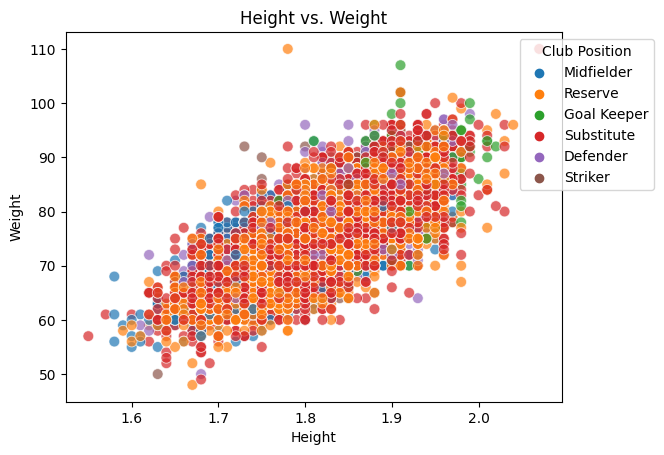

In [94]:
'''
Doing the same scatterplot but now with fewer position categorises, We might see the relationship between position with height and  weight
'''
sns.scatterplot(x='Height (m)', y='Weight', data=df, hue='Positions',
                palette='tab10', s=60, edgecolor='w', alpha=0.7)

# Add a legend for the hue
plt.legend(title='Club Position', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [82]:
df.head()

,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,...,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Height (m),BMI,Positions
0,Cristiano Ronaldo,Portugal,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185.0,80.0,...,85,88,14,7,15,11,11,1.85,23.37,Midfielder
1,Lionel Messi,Argentina,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170.0,72.0,...,74,85,14,6,15,11,8,1.70,24.91,Midfielder
2,Neymar,Brazil,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174.0,68.0,...,81,83,15,9,15,9,11,1.74,22.46,Midfielder
3,Luis Suárez,Uruguay,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182.0,85.0,...,85,88,33,27,31,25,37,1.82,25.66,Reserve
4,Manuel Neuer,Germany,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193.0,92.0,...,47,11,91,89,95,90,89,1.93,24.70,Goal Keeper


**There is a correlation between the height and weight of the players. We also cannot identify the relationship between the  players position with both the height and weight.**

### Pairplot  
Creating a pairplot compare how age affects accelaration, speed, composure, stamina, agility and shot power.

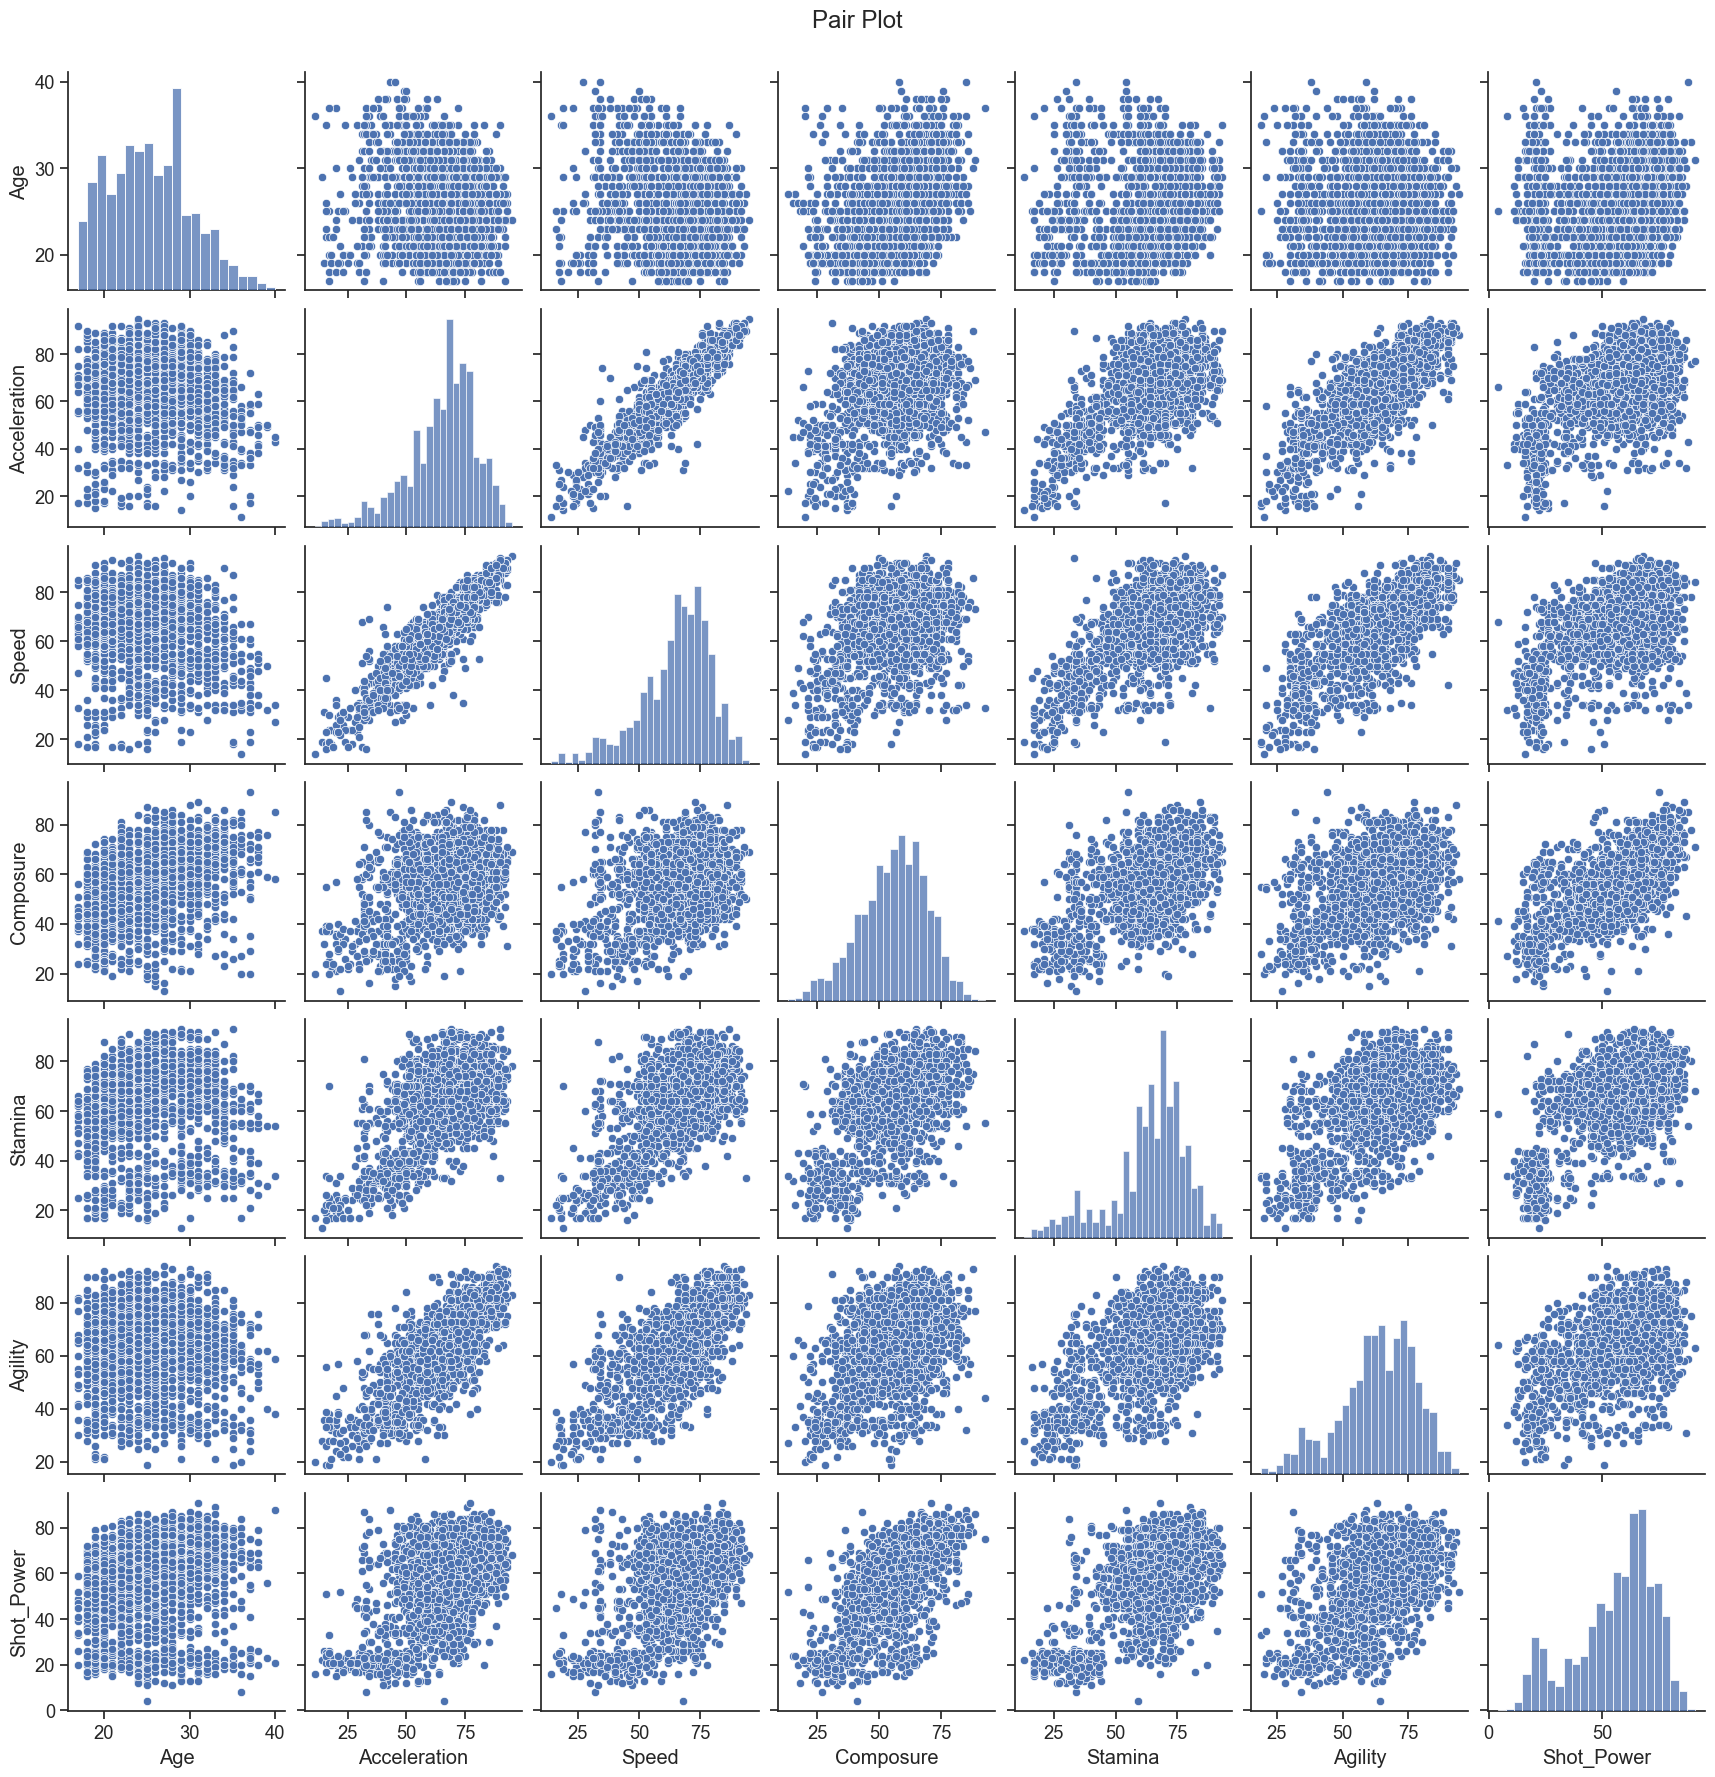

In [23]:
sns.set(style='ticks', font_scale=1.2)

# create a pairplot 
sns.pairplot(df.sample(2000), vars=['Age', 'Acceleration', 'Speed', 'Composure', 'Stamina', 'Agility', 'Shot_Power'])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

This pairplot is showing us something different to what we thought we would see. The most pronounced relationship is between acceleration and all the other features namely agility, stamina, speed and shot power. There's a positive correlation between accelaration and these other mentioned features. We will now visualise the numerical value of the  correlation. 

**Numerical Correlation Viz**

<Axes: >

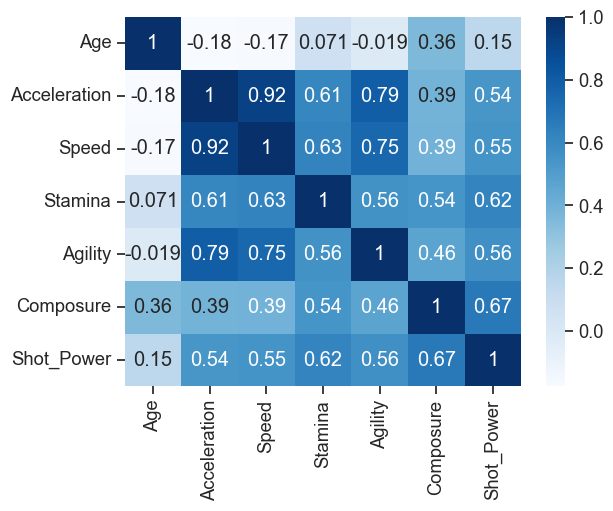

In [24]:
# Calculating the correlation
corr = df[['Age', 'Acceleration', 'Speed', 'Stamina', 'Agility', 'Composure', 'Shot_Power']].corr()
sns.heatmap(corr, cmap='Blues', annot=True)

The correlation plot support the above visual, there is a positive correlation between Accelaration and the other fetures.

### Age Distribution

<Axes: xlabel='Age', ylabel='Density'>

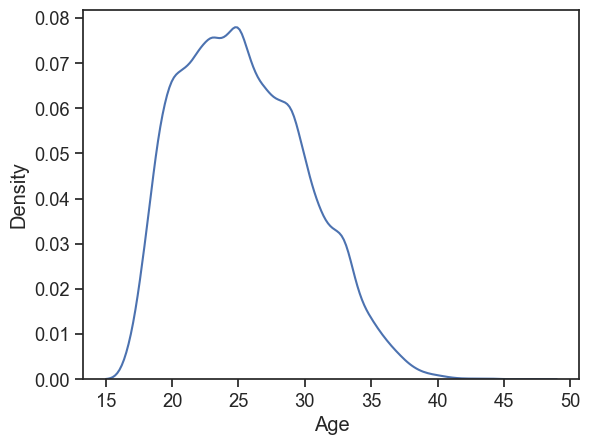

In [31]:
sns.kdeplot(data=df, x='Age')

We need to plot a boxplot to get the min, median and max ages of the players we have. We can see that many of our players are relatively young.

<Axes: xlabel='Age'>

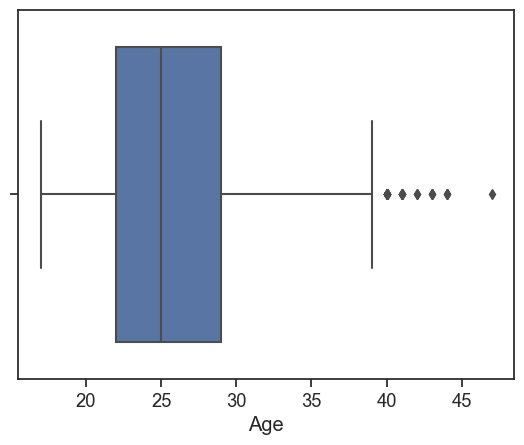

In [33]:
sns.boxplot(x=df['Age'])

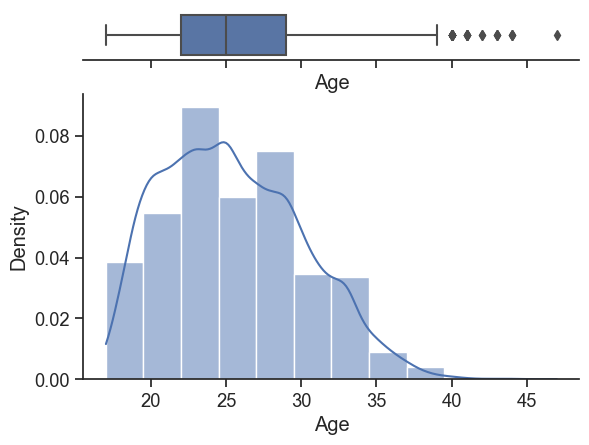

In [35]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=df['Age'], ax=ax_box)
sns.histplot(x=df['Age'], bins=12, kde=True, stat='density', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

## 5. Feature Engineering <a name="feature-engineering"></a>
Describe how you engineered or selected the features used for modeling. Explain the rationale behind your choices and any domain-specific knowledge applied.

[Back to Top](#table-of-contents)

---


## 6. Modeling <a name="modeling"></a>
Discuss the machine learning or statistical models you utilized in your project. Include information on model selection, hyperparameter tuning, and model training.

[Back to Top](#table-of-contents)

---



## 7. Evaluation <a name="evaluation"></a>
Present the evaluation metrics used to assess the performance of your models. Discuss the results and any adjustments made based on the evaluation.

[Back to Top](#table-of-contents)

---


## 8. Conclusion <a name="Conclusion"></a>
Summarize your findings, the implications of your work, and potential areas for future improvement or research.

[Back to Top](#table-of-contents)